In [1]:
!pip install git+https://github.com/Kaggle/learntools.git


  Cloning https://github.com/Kaggle/learntools.git to /tmp/pip-req-build-yp75a0ac
  Running command git clone --filter=blob:none --quiet https://github.com/Kaggle/learntools.git /tmp/pip-req-build-yp75a0ac
  Resolved https://github.com/Kaggle/learntools.git to commit ca2a51ee0085e4943cadaf5e9fe7dce2ec947d3c
  Preparing metadata (setup.py) ... done
  Created wheel for learntools: filename=learntools-0.3.4-py3-none-any.whl size=268968 sha256=4bc2c7afd9a3d31743e78e2936524f900db397307b6ef07d80f5cdc5f4dabadd
  Stored in directory: /tmp/pip-ephem-wheel-cache-getbcut8/wheels/2f/6c/3c/aa9f50cfb5a862157cb4c7a5b34881828cf45404698255dced
Successfully built learntools


In [2]:
# -- Packages
import numpy as np
import pandas as pd
import os


# -- Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from learntools.time_series.style import *  # plot style settings
from learntools.time_series.utils import (seasonal_plot,
                                          plot_periodogram,
                                          make_lags,
                                          make_leads,
                                          plot_lags,
                                          make_multistep_target,
                                          plot_multistep)

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_DaNang_Updated.csv')

In [5]:
df['date'] = pd.to_datetime(df['date'])

df = df.sort_values(by='date')
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     1979 non-null   int64         
 1   date      1979 non-null   datetime64[ns]
 2   pm25      1979 non-null   float64       
 3   pm10      1979 non-null   float64       
 4   o3        1979 non-null   float64       
 5   no2       1979 non-null   float64       
 6   so2       1979 non-null   float64       
 7   co        1979 non-null   float64       
 8   AQI_pm25  1979 non-null   float64       
 9   AQI_pm10  1979 non-null   float64       
 10  AQI_o3    1979 non-null   float64       
 11  AQI_no2   1979 non-null   float64       
 12  AQI_so2   1979 non-null   float64       
 13  AQI_co    1979 non-null   float64       
 14  AQI       1979 non-null   float64       
dtypes: datetime64[ns](1), float64(13), int64(1)
memory usage: 232.0 KB


In [6]:
df.describe()

index                 date         pm25         pm10  \
count  1979.000000                 1979  1979.000000  1979.000000   
mean    989.000000  2021-09-16 00:00:00    39.021728    21.879232   
min       0.000000  2019-01-01 00:00:00     1.000000     1.000000   
25%     494.500000  2020-05-09 12:00:00    24.000000    14.000000   
50%     989.000000  2021-09-16 00:00:00    35.000000    20.000000   
75%    1483.500000  2023-01-23 12:00:00    49.000000    28.000000   
max    1978.000000  2024-06-01 00:00:00   312.000000   448.000000   
std     571.432411                  NaN    23.356992    15.449486   

                o3          no2          so2           co     AQI_pm25  \
count  1979.000000  1979.000000  1979.000000  1979.000000  1979.000000   
mean     55.348156    11.560384    11.606367     3.066700    75.215260   
min       5.000000     1.000000     1.000000     1.000000     2.000000   
25%      21.000000    10.000000     6.000000     2.000000    48.000000   
50%      33.000000    11.000000    12.000000     3.000000    70.000000   
75%      58.000000    15.000000    13.000000     4.000000    98.000000   
max     500.000000    50.000000    43.000000    29.000000   362.000000   
std      81.818065     5.943258     7.278039     2.295112    37.343568   

          AQI_pm10       AQI_o3      AQI_no2      AQI_so2       AQI_co  \
count  1979.000000  1979.000000  1979.000000  1979.000000  1979.000000   
mean     21.645023    20.141707     5.780192     4.642547    15.181910   
min       1.000000     1.562500     0.500000     0.400000     5.000000   
25%      14.000000     6.562500     5.000000     2.400000    10.000000   
50%      20.000000    10.312500     5.500000     4.800000    15.000000   
75%      28.000000    18.125000     7.500000     5.200000    20.000000   
max     335.000000   225.000000    25.000000    17.200000    97.500000   
std      12.639072    38.183172     2.971629     2.911216    10.381914   

               AQI  
count  1979.000000  
mean     81.486841  
min      10.000000  
25%      50.000000  
50%      74.000000  
75%     101.666667  
max     362.000000  
std      43.831828

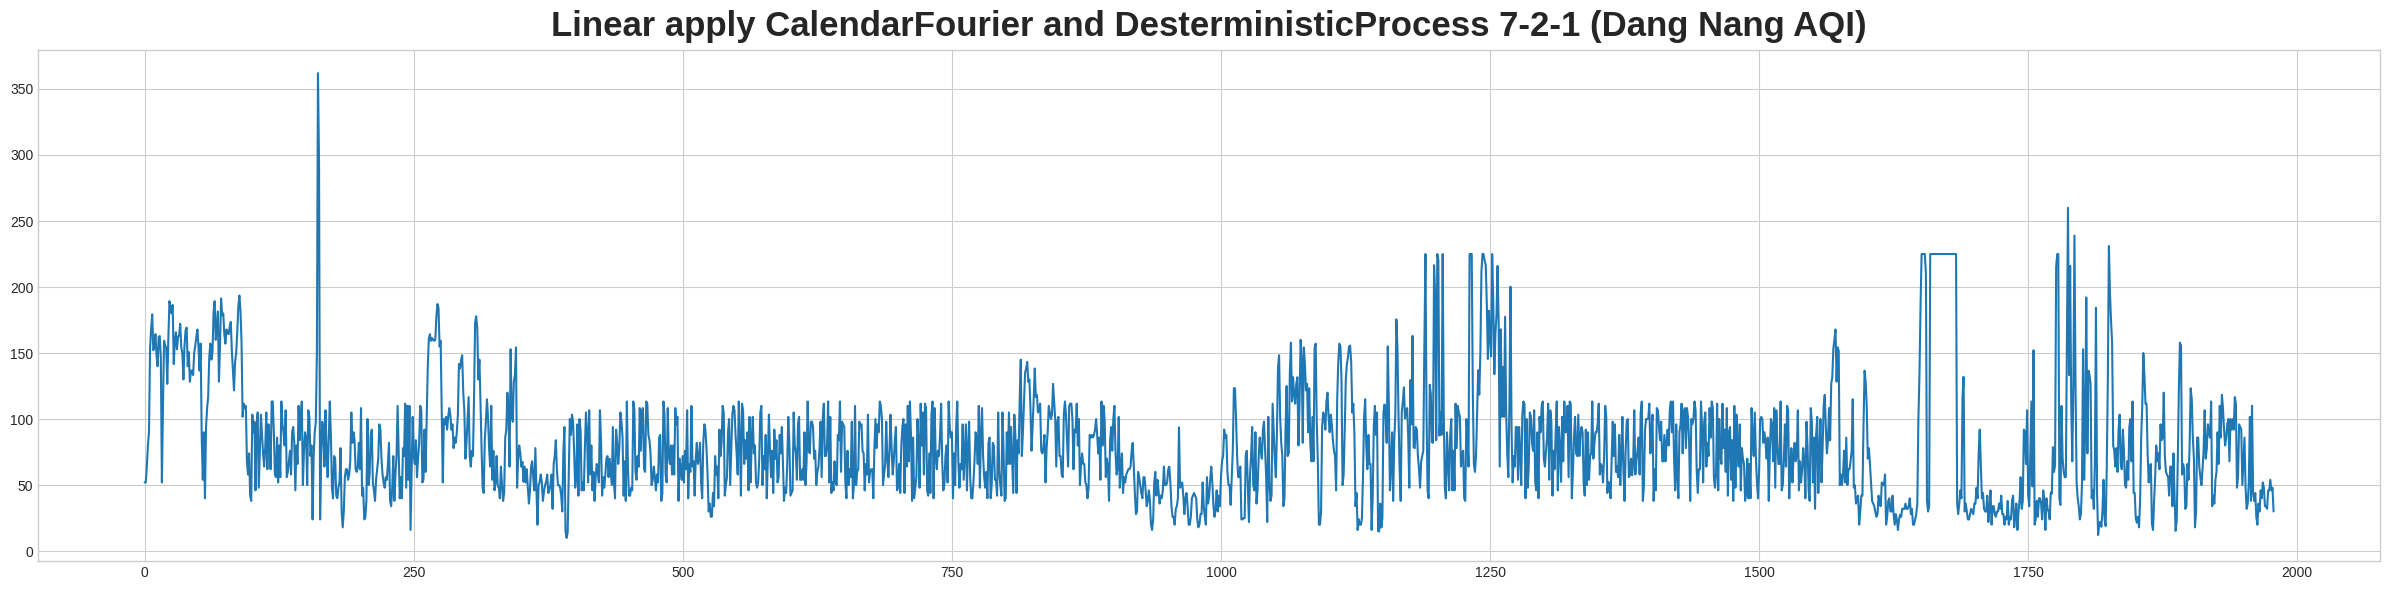

In [7]:
plt.figure(figsize=(24, 6))
plt.plot(df.index, df['AQI'])
plt.legend()
plt.title('Linear apply CalendarFourier and DesterministicProcess 7-2-1 (Dang Nang AQI)', fontsize=25)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ba1dbedb880>,
 'caps': [<matplotlib.lines.Line2D at 0x7ba1dbedbca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ba1dbedb5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ba1dbf08220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ba1dbf084c0>],
 'means': []}

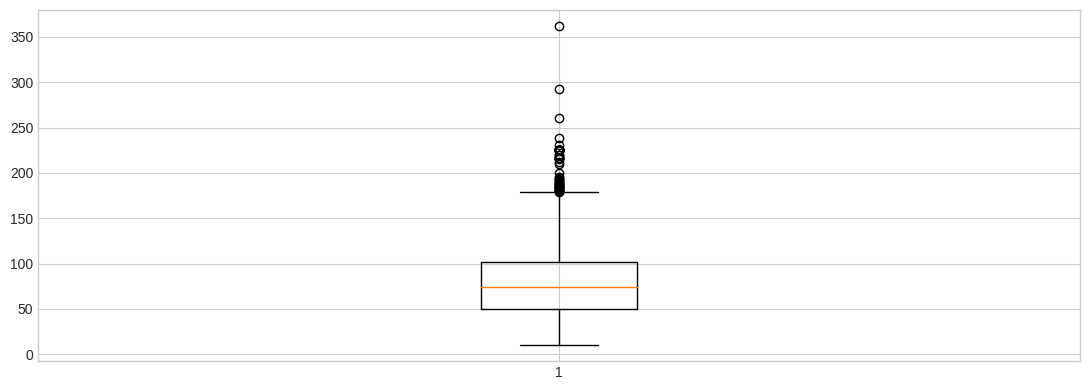

In [8]:
plt.boxplot(df['AQI'])

In [ ]:
# Tính các giá trị Q1 (quartile 1), Q3 (quartile 3) và IQR (Interquartile Range)
Q1 = df['AQI'].quantile(0.25)
Q3 = df['AQI'].quantile(0.75)
IQR = Q3 - Q1

# Xác định các giới hạn dưới và trên cho các điểm ngoại lệ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Đếm các điểm nằm ngoài các giới hạn này
outliers = df[(df['AQI'] < lower_bound) | (df['AQI'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f'Tổng số điểm nhiễu: {num_outliers}')

Tổng số điểm nhiễu: 71


In [9]:
data = df[['date', 'AQI']]
data = data.set_index('date').to_period('D')
data.sort_index()


AQI
date            
2019-01-01  52.0
2019-01-02  52.0
2019-01-03  64.0
2019-01-04  80.0
2019-01-05  90.0
...          ...
2024-05-28  46.0
2024-05-29  54.0
2024-05-30  46.0
2024-05-31  48.0
2024-06-01  30.0

[1979 rows x 1 columns]

In [10]:
# MA
average_AQI = data.groupby('date').mean()['AQI']
average_AQI

trend = average_AQI.rolling(
    window=365,
    center=True,
    min_periods=183,
).mean()

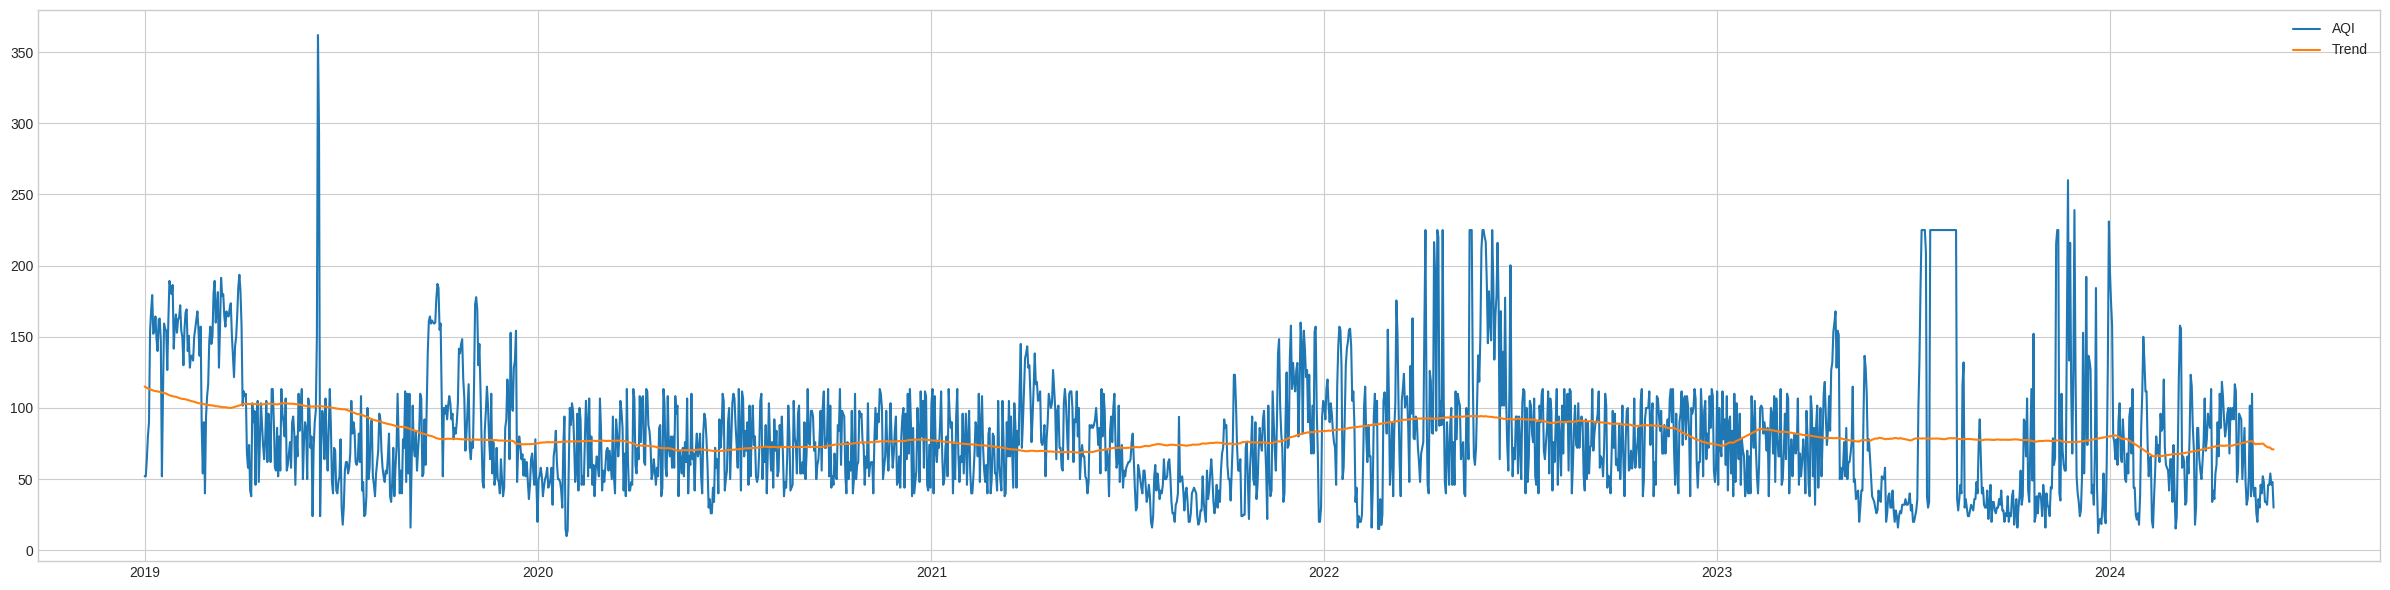

In [11]:
plt.figure(figsize=(24, 6))
plt.plot(df['date'], df['AQI'])
plt.plot(df['date'],trend)

plt.legend(['AQI', 'Trend'])
plt.show()

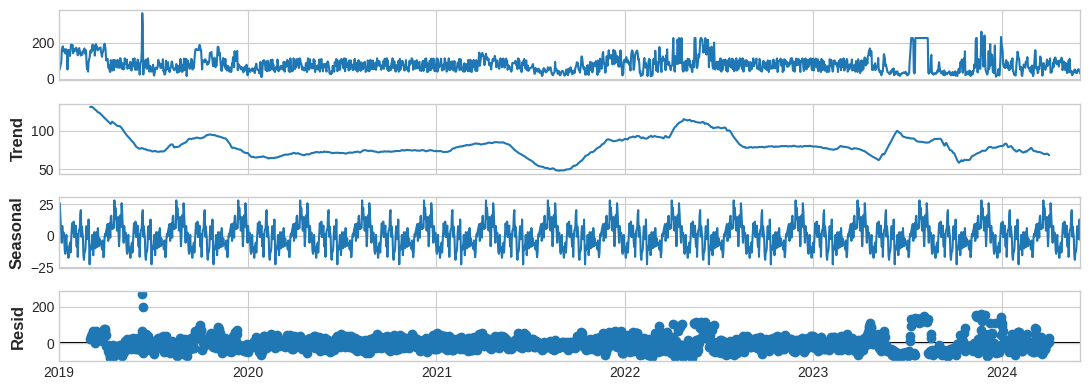

In [12]:
data_temp = df[['date', 'AQI']]
data_temp = data_temp.set_index('date').to_period('D')
data_temp.index = data_temp.index.to_timestamp(freq='D')
data_temp.sort_index()
from statsmodels.tsa.seasonal import seasonal_decompose

# Phân tích thành phần chuỗi thời gian
result = seasonal_decompose(data_temp, model='additive', period=120)

# Vẽ các thành phần
result.plot()
plt.show()


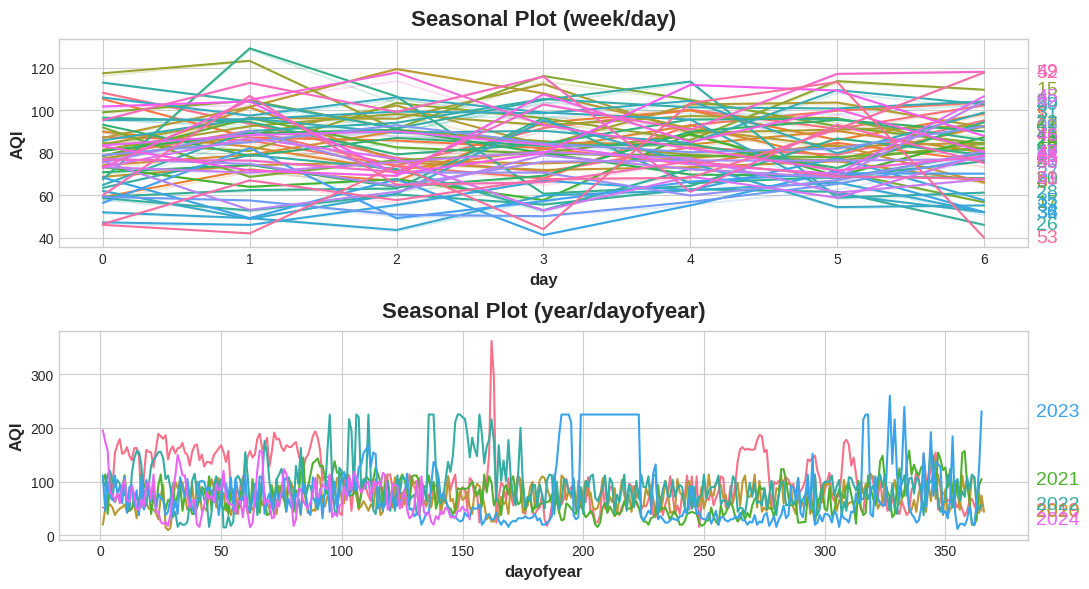

In [13]:
X = data.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, data['AQI'], period="week", freq="day", ax=ax0)
seasonal_plot(X, data['AQI'], period="year", freq="dayofyear", ax=ax1);

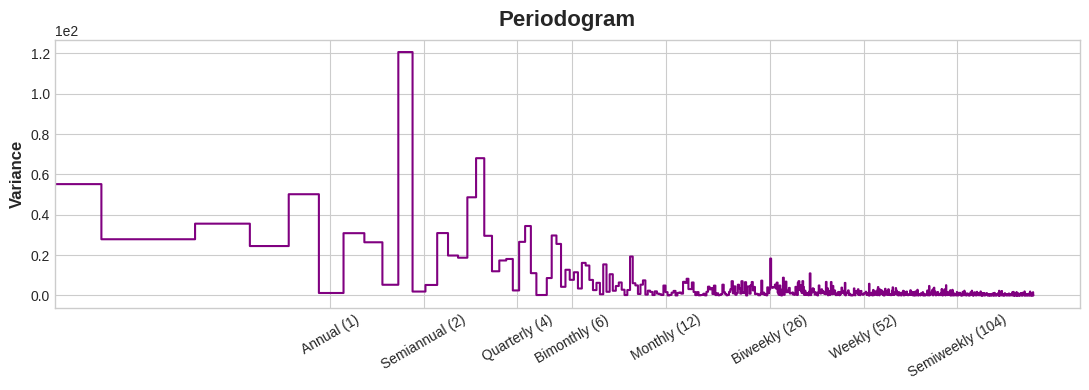

In [14]:
# data_temp = data.loc['2019']
data_temp = data
plot_periodogram(data_temp['AQI']);

In [15]:
#Chia train test 7:3
train_size = int(0.7*len(df))

train_data = data[:train_size]
test_data = data[train_size:]


In [16]:
#Create training data

y_train = train_data

fourier = CalendarFourier(freq='A', order =365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

In [17]:
# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)


In [18]:
# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# # -- Preparing the validate data
# X_val = dp.out_of_sample(steps=len(val_data))
# y_val_pred = model.predict(X_val)



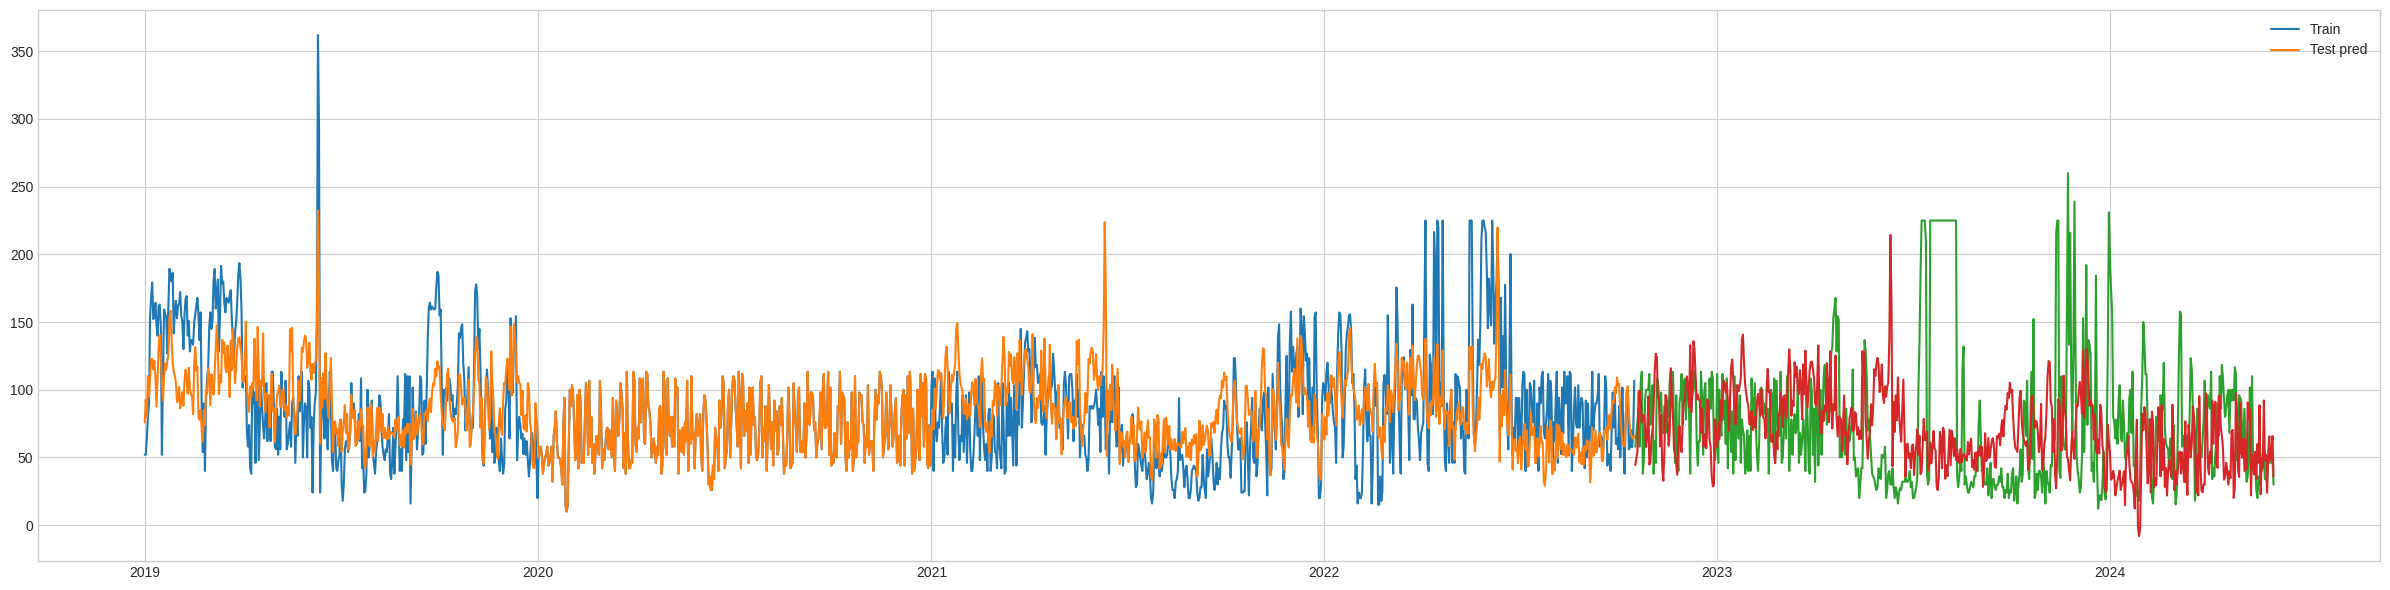

In [19]:
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)
plt.plot(train_data.index.to_timestamp(), y_pred)


plt.plot(test_data.index.to_timestamp(), test_data)
plt.plot(test_data.index.to_timestamp(), y_test_pred)

# plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(), y_val_pred)
plt.legend(['Train', 'Test pred'])
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)
mape = np.mean(np.abs((test_data - y_test_pred) / test_data)) * 100

# print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')



RMSE: 60.47716668661091
MAE: 43.792953393906565
MAPE: 73.89908001616615


In [25]:
# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')
future_60dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=60, freq='D').to_period('D')
future_90dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=90, freq='D').to_period('D')


X_future = dp.out_of_sample(steps=30)
X_60future = dp.out_of_sample(steps=60)
X_90future = dp.out_of_sample(steps=90)

y_next_30days = model.predict(X_future)
y_next_60days = model.predict(X_60future)
y_next_90days = model.predict(X_90future)


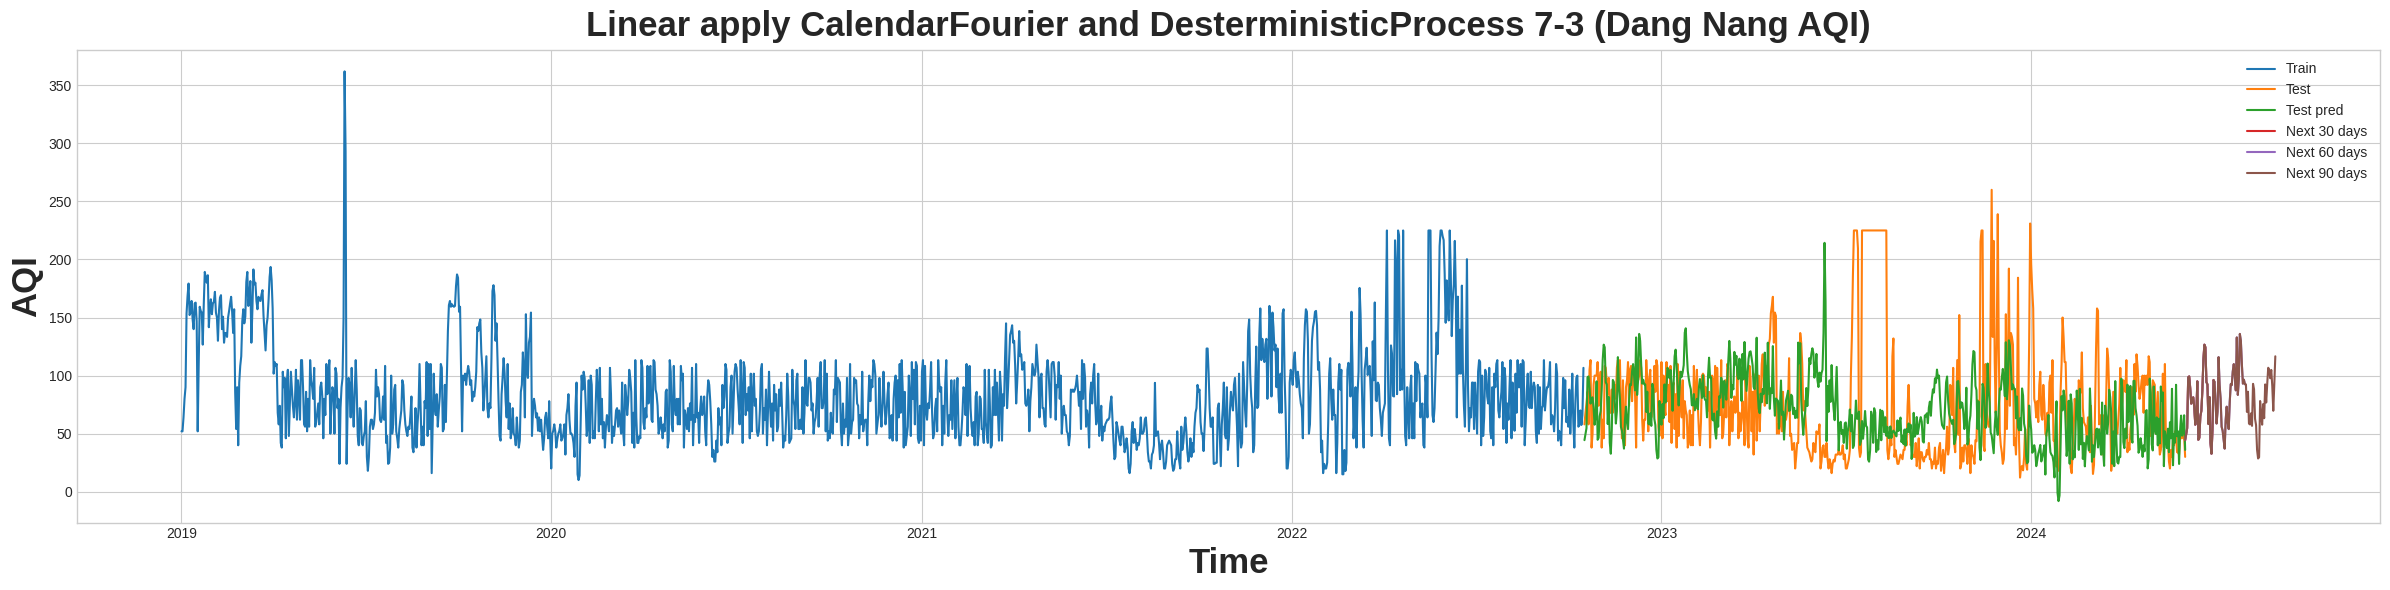

In [26]:
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
plt.plot(test_data.index.to_timestamp(), y_test_pred)

# plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.plot(future_60dates.to_timestamp(), y_next_60days)
plt.plot(future_90dates.to_timestamp(), y_next_90days)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 7-3 (Dang Nang AQI)', fontsize=25)
plt.xlabel('Time', fontsize=25)
plt.ylabel('AQI', fontsize=25)
plt.show()

8:1:1

In [27]:
# Chia du lieu 8:2
train_size = int(0.8*len(df))

train_data = data[:train_size]
test_data = data[train_size:]


#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order =365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
# X_val = dp.out_of_sample(steps=len(val_data))
# y_val_pred = model.predict(X_val)


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)
mape = np.mean(np.abs((test_data - y_test_pred) / test_data)) * 100

# print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')



MSE: 4847.414683921029
RMSE: 69.62337742397325
MAE: 51.119081030756995


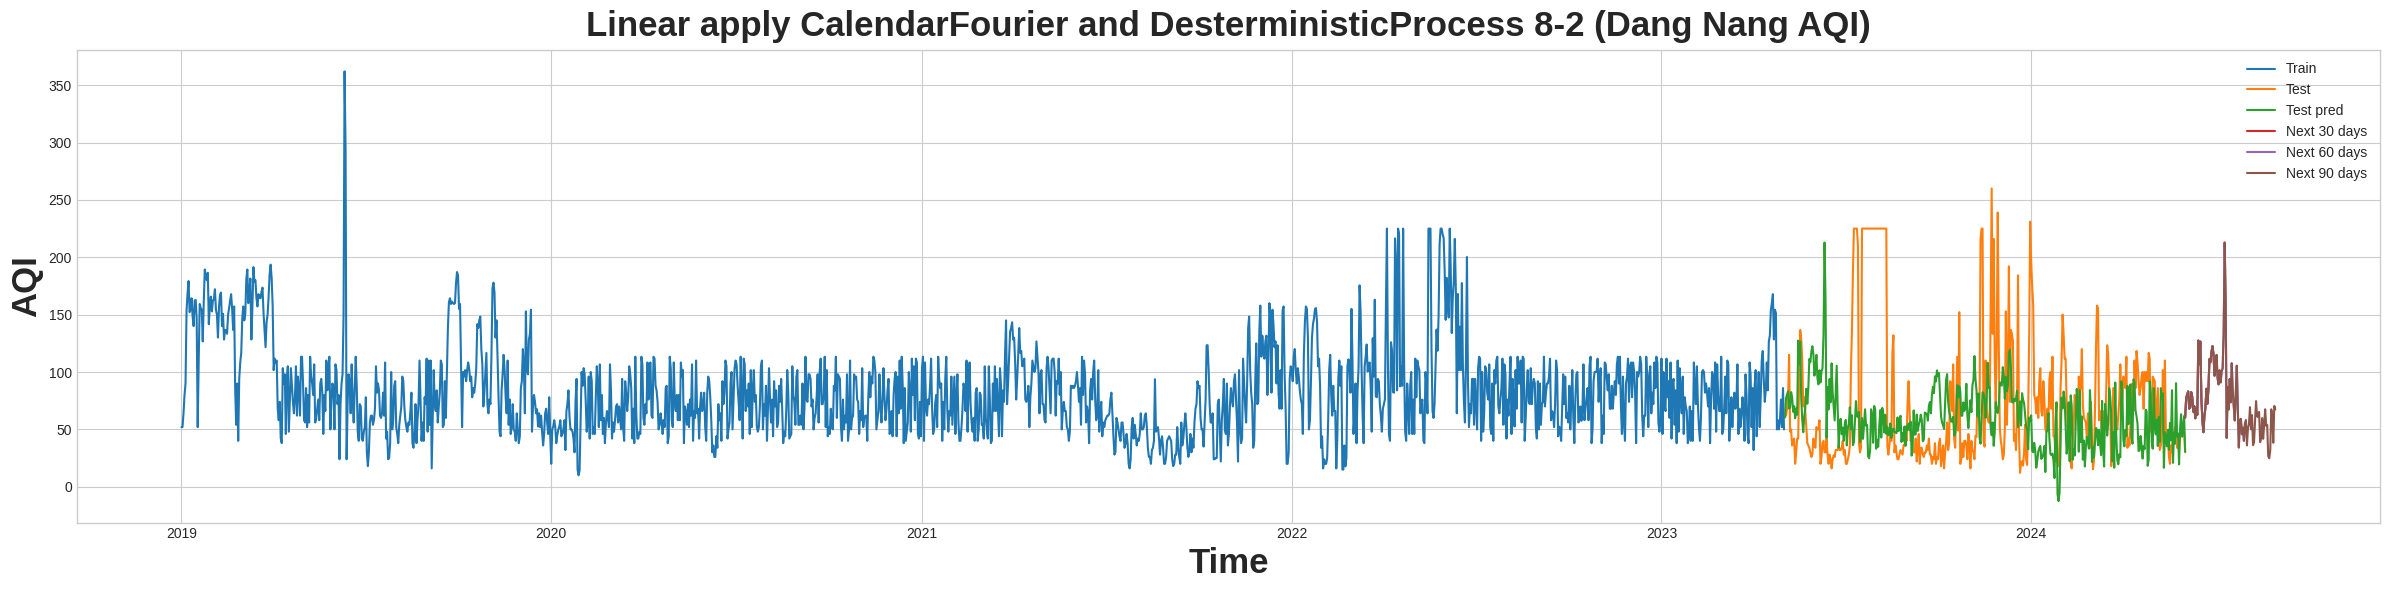

In [29]:
# Du doan cho 30 ngay trong tuong lai
# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')
future_60dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=60, freq='D').to_period('D')
future_90dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=90, freq='D').to_period('D')


X_future = dp.out_of_sample(steps=30)
X_60future = dp.out_of_sample(steps=60)
X_90future = dp.out_of_sample(steps=90)

y_next_30days = model.predict(X_future)
y_next_60days = model.predict(X_60future)
y_next_90days = model.predict(X_90future)


# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
plt.plot(test_data.index.to_timestamp(), y_test_pred)

# plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.plot(future_60dates.to_timestamp(), y_next_60days)
plt.plot(future_90dates.to_timestamp(), y_next_90days)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 8-2 (Dang Nang AQI)', fontsize=25)
plt.xlabel('Time', fontsize=25)
plt.ylabel('AQI', fontsize=25)
plt.show()

6:2:2

In [30]:
# Chia du lieu 9:1
train_size = int(0.9*len(df))

train_data = data[:train_size]
test_data = data[train_size:]


#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order = 365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
# X_val = dp.out_of_sample(steps=len(val_data))
# y_val_pred = model.predict(X_val)


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính toán các chỉ số đánh giá (tren tap test)
# mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)
mape = np.mean(np.abs((test_data - y_test_pred) / test_data)) * 100

# print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')



MSE: 2810.008021302814
RMSE: 53.009508781942266
MAE: 41.08901824269475


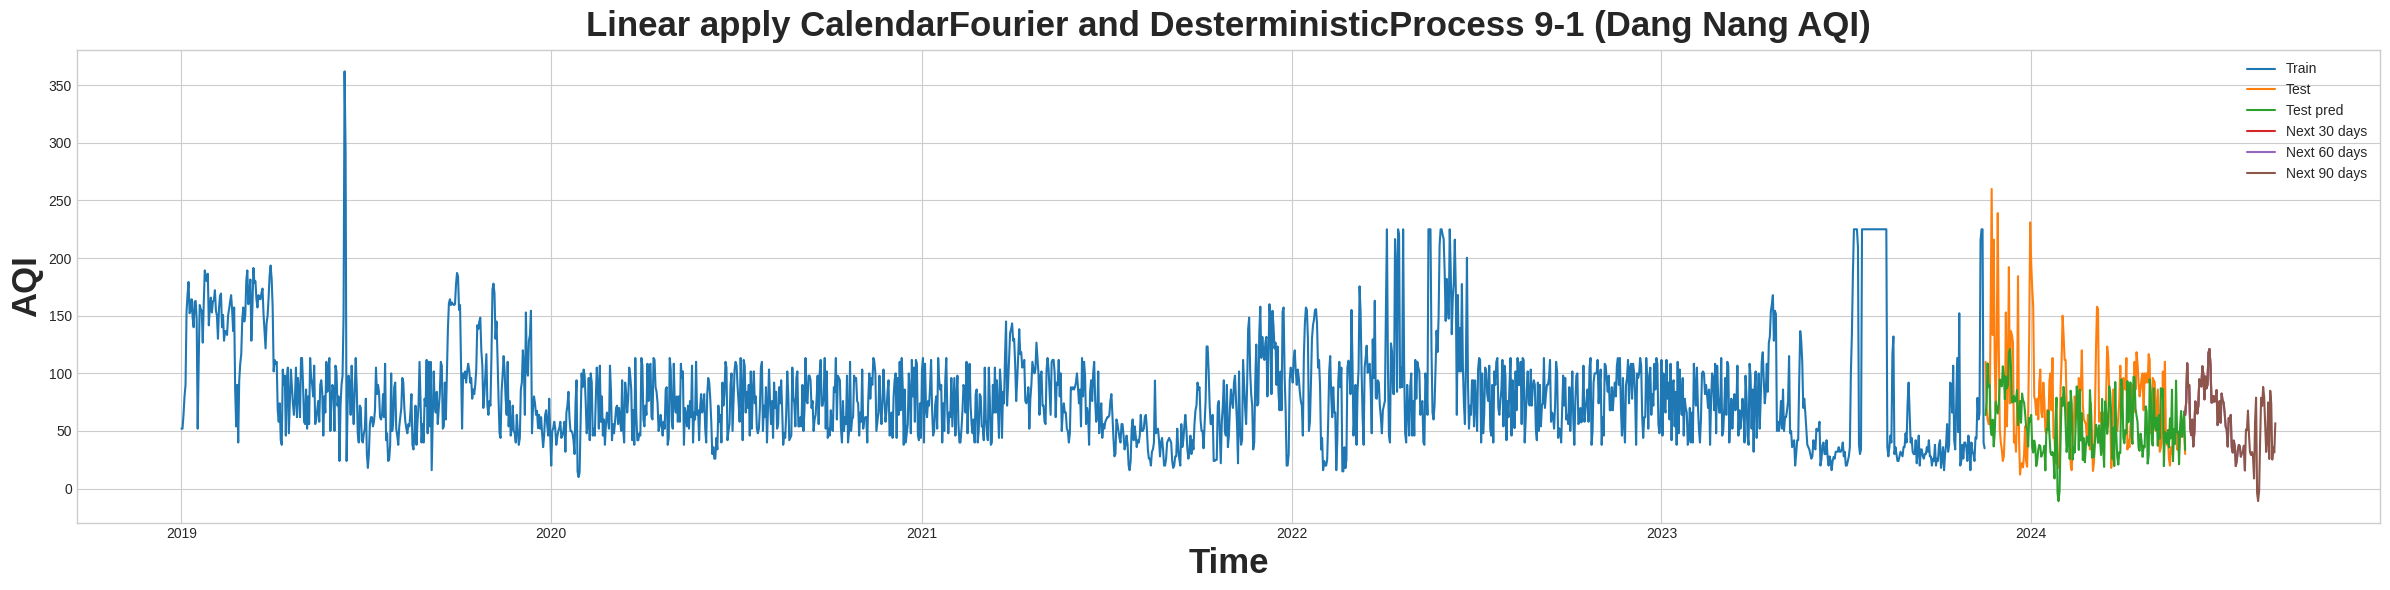

In [32]:
# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')
future_60dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=60, freq='D').to_period('D')
future_90dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=90, freq='D').to_period('D')


X_future = dp.out_of_sample(steps=30)
X_60future = dp.out_of_sample(steps=60)
X_90future = dp.out_of_sample(steps=90)

y_next_30days = model.predict(X_future)
y_next_60days = model.predict(X_60future)
y_next_90days = model.predict(X_90future)

# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
plt.plot(test_data.index.to_timestamp(), y_test_pred)

# plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.plot(future_60dates.to_timestamp(), y_next_60days)
plt.plot(future_90dates.to_timestamp(), y_next_90days)
plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 9-1 (Dang Nang AQI)', fontsize=25)
plt.xlabel('Time', fontsize=25)
plt.ylabel('AQI', fontsize=25)
plt.show()

## Ha Noi ##

In [33]:
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_HaNoi_Updated.csv')
df['date'] = pd.to_datetime(df['date'])

df = df.sort_values(by='date')
df = df.reset_index()


data = df[['date', 'AQI']]
data = data.set_index('date').to_period('D')
data.sort_index()


AQI
date                  
2019-01-01  154.285714
2019-01-01  152.857143
2019-01-02  116.666667
2019-01-02   92.000000
2019-01-03   78.000000
...                ...
2024-05-28  153.571429
2024-05-29  113.333333
2024-05-30   94.000000
2024-05-31   96.000000
2024-06-01  162.857143

[2101 rows x 1 columns]

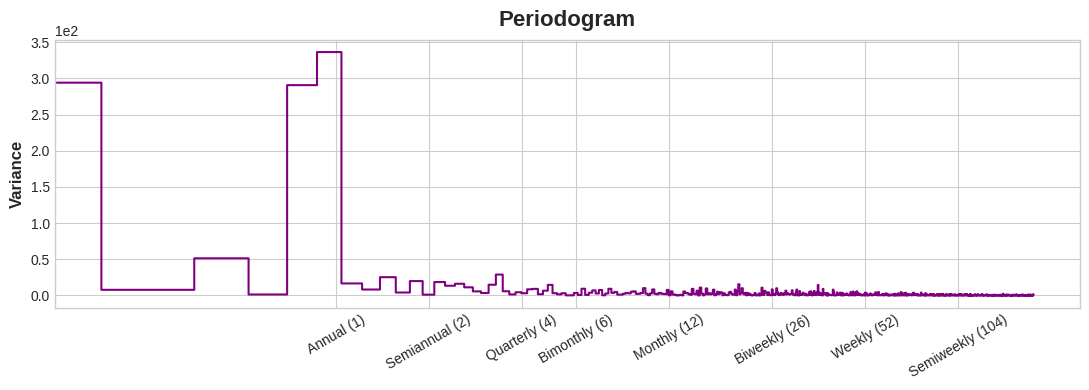

In [34]:
# data_temp = data.loc['2019']
data_temp = data
plot_periodogram(data_temp['AQI']);

7:2:1

In [35]:
# Chia du lieu 7:3
train_size = int(0.7*len(df))

train_data = data[:train_size]
test_data = data[train_size:]


#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order = 365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
# X_val = dp.out_of_sample(steps=len(val_data))
# y_val_pred = model.predict(X_val)


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)
mape = np.mean(np.abs((test_data - y_test_pred) / test_data)) * 100

# print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')



RMSE: 69.24970252989061
MAE: 59.40308817514886
MAPE: 48.46643621652147


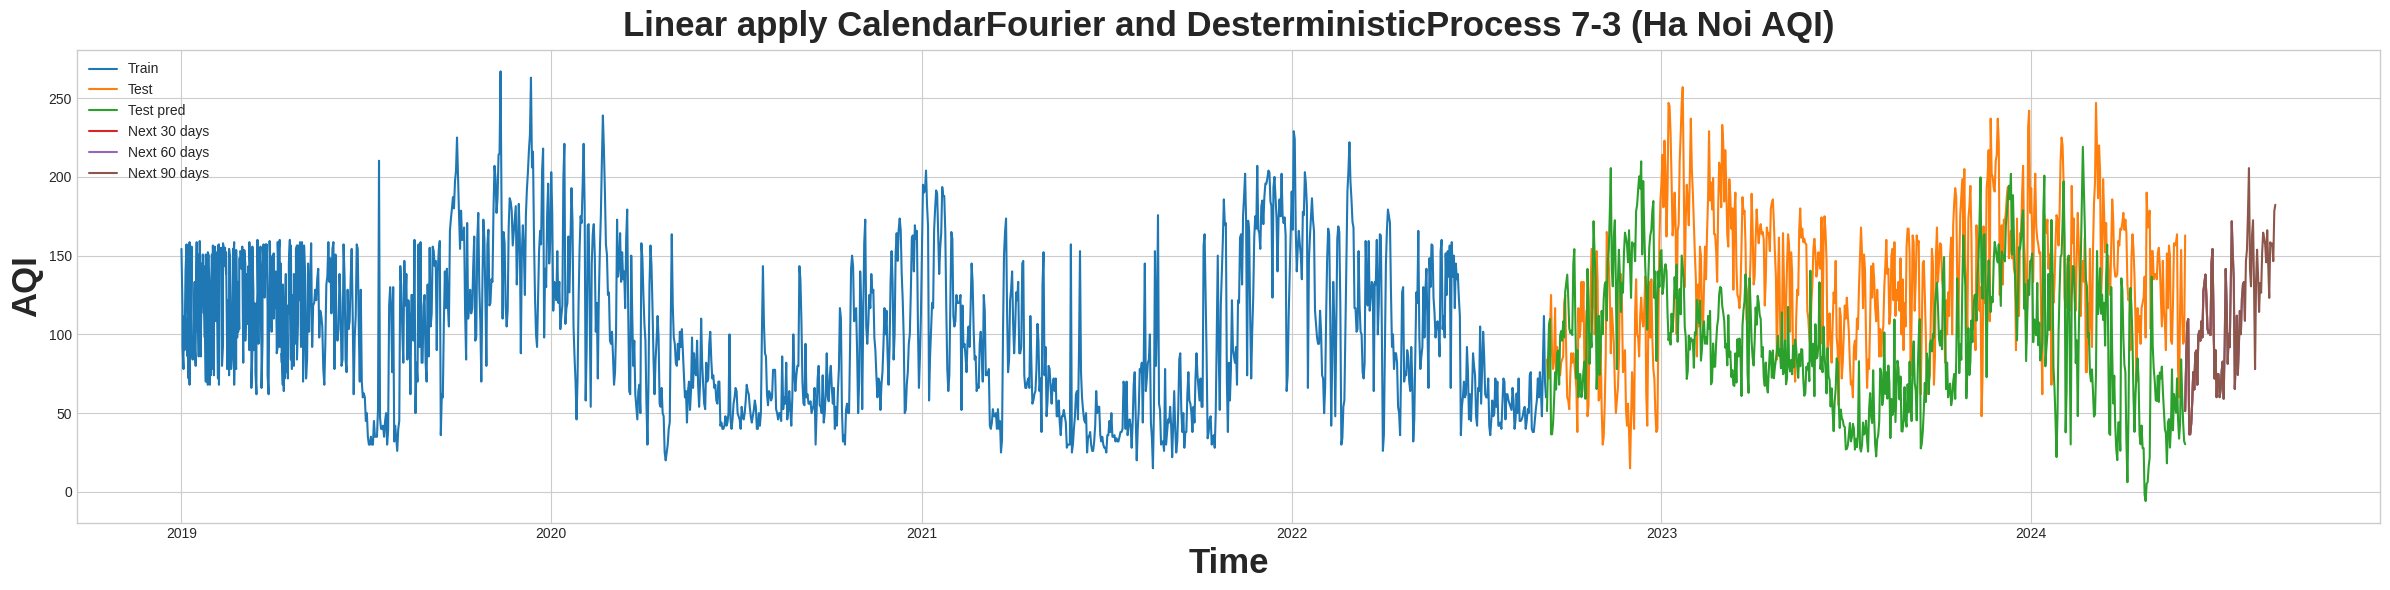

In [37]:
# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')
future_60dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=60, freq='D').to_period('D')
future_90dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=90, freq='D').to_period('D')


X_future = dp.out_of_sample(steps=30)
X_60future = dp.out_of_sample(steps=60)
X_90future = dp.out_of_sample(steps=90)

y_next_30days = model.predict(X_future)
y_next_60days = model.predict(X_60future)
y_next_90days = model.predict(X_90future)

# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
plt.plot(test_data.index.to_timestamp(), y_test_pred)

# plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.plot(future_60dates.to_timestamp(), y_next_60days)
plt.plot(future_90dates.to_timestamp(), y_next_90days)
plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 7-3 (Ha Noi AQI)', fontsize=25)
plt.xlabel('Time', fontsize=25)
plt.ylabel('AQI', fontsize=25)
plt.show()

8:1:1

RMSE: 61.55509327201705
MAE: 52.16184519291585
MAPE: 37.45095261504123


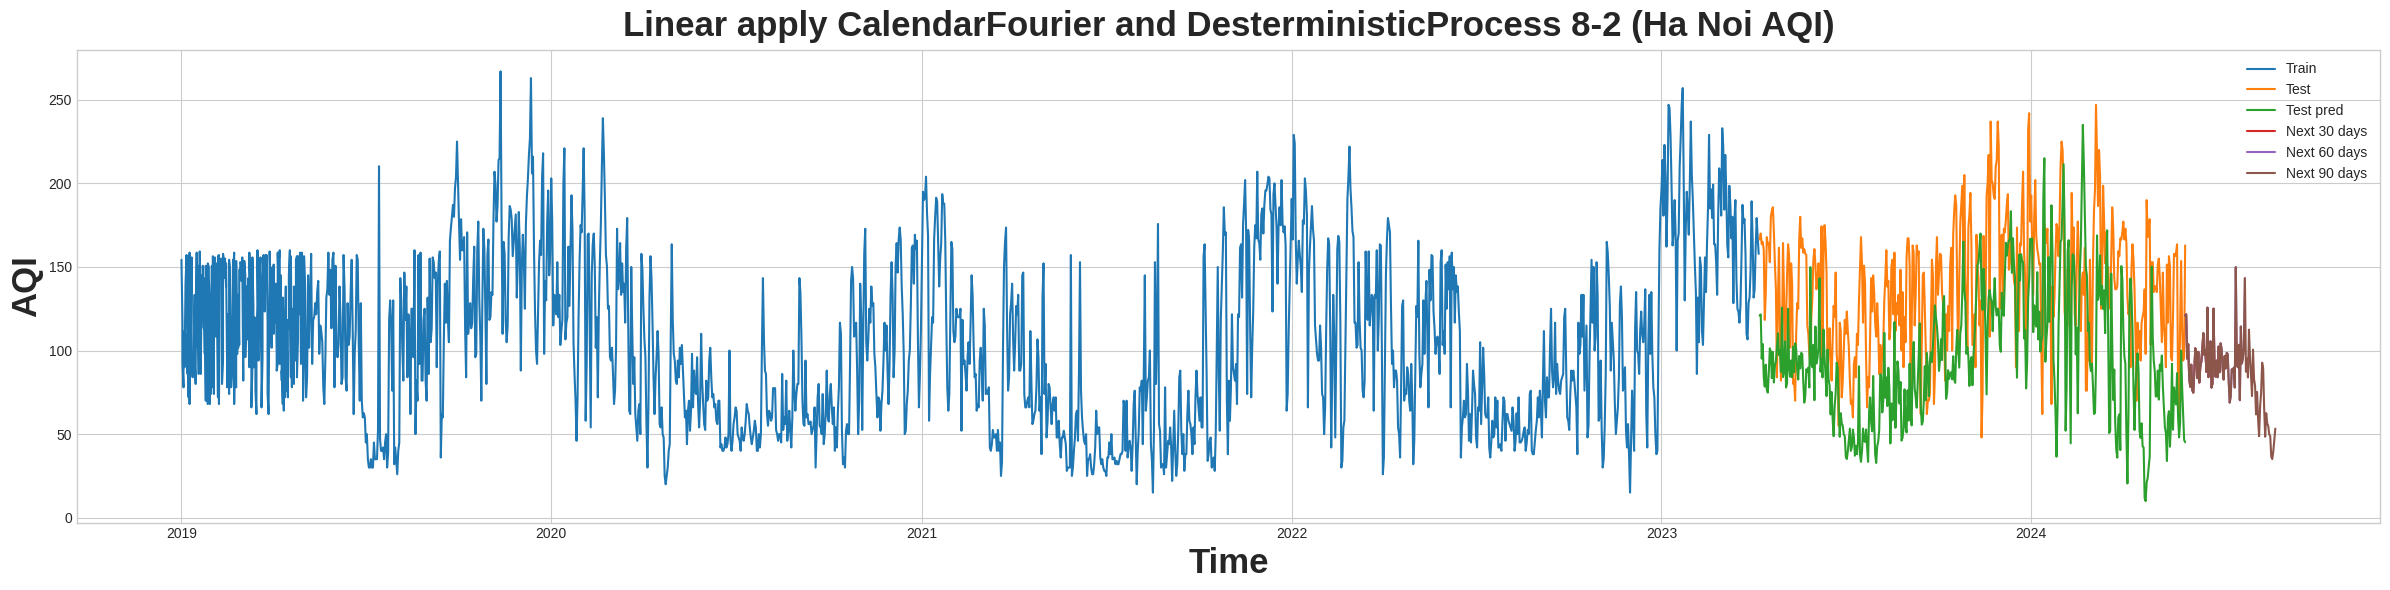

In [38]:
# Chia du lieu 8:2
train_size = int(0.8*len(df))

train_data = data[:train_size]
test_data = data[train_size:]



#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order = 365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
# X_val = dp.out_of_sample(steps=len(val_data))
# y_val_pred = model.predict(X_val)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)
mape = np.mean(np.abs((test_data - y_test_pred) / test_data)) * 100

# print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')



# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')
future_60dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=60, freq='D').to_period('D')
future_90dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=90, freq='D').to_period('D')


X_future = dp.out_of_sample(steps=30)
X_60future = dp.out_of_sample(steps=60)
X_90future = dp.out_of_sample(steps=90)

y_next_30days = model.predict(X_future)
y_next_60days = model.predict(X_60future)
y_next_90days = model.predict(X_90future)

# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
plt.plot(test_data.index.to_timestamp(), y_test_pred)

# plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.plot(future_60dates.to_timestamp(), y_next_60days)
plt.plot(future_90dates.to_timestamp(), y_next_90days)
plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 8-2 (Ha Noi AQI)', fontsize=25)
plt.xlabel('Time', fontsize=25)
plt.ylabel('AQI', fontsize=25)
plt.show()

RMSE: 54.79328535821428
MAE: 44.33886390919427
MAPE: 31.49338257515136


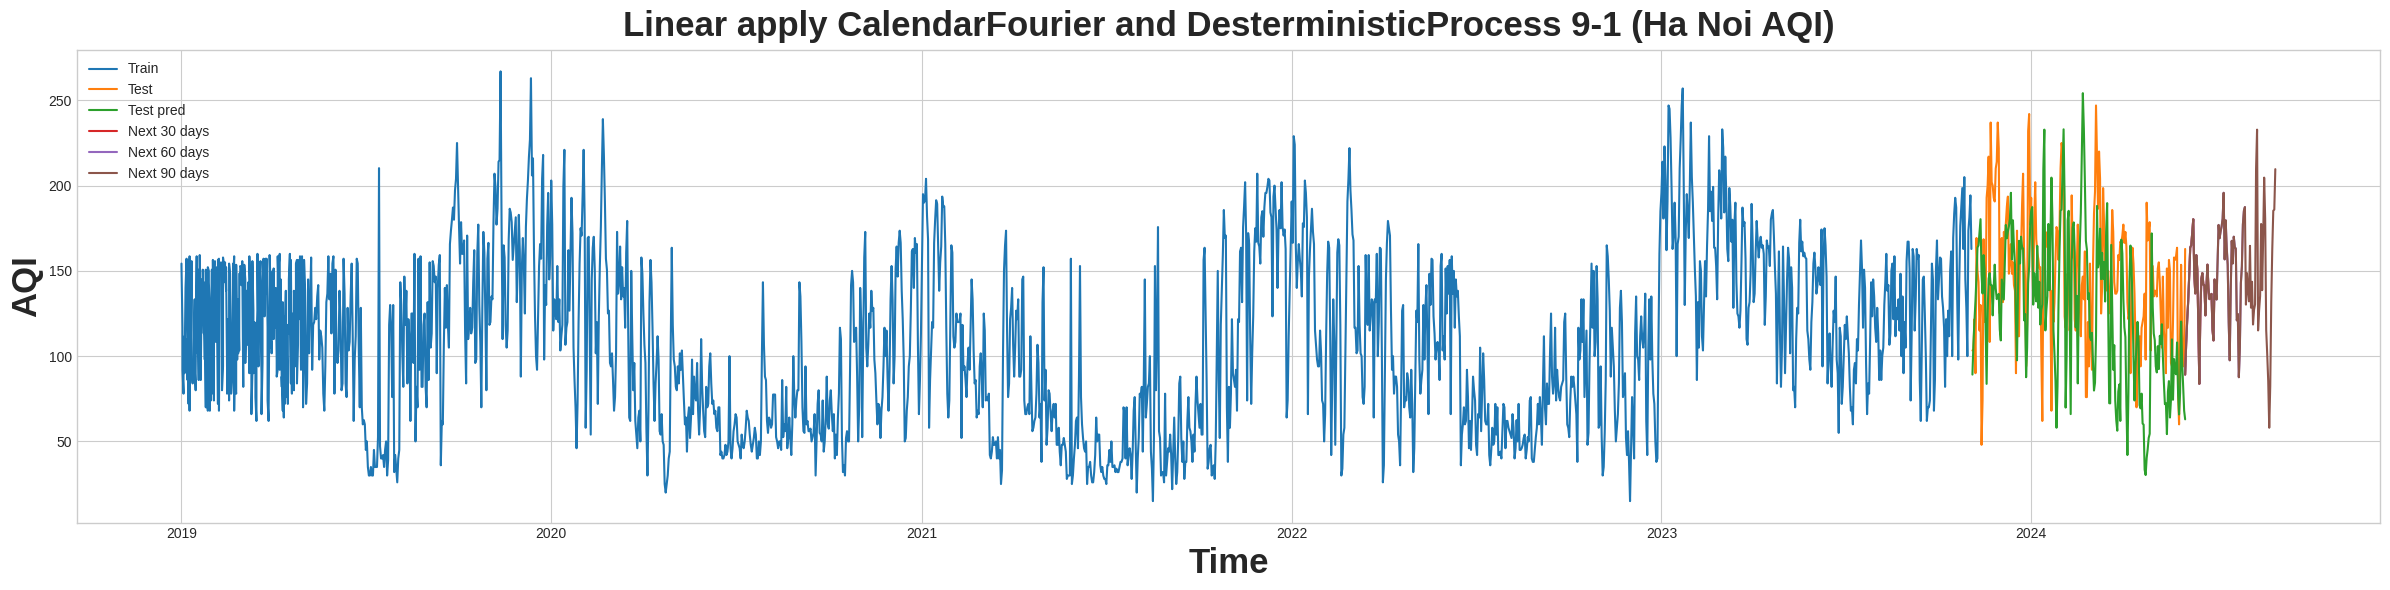

In [39]:
# Chia du lieu 9-1
train_size = int(0.9*len(df))


train_data = data[:train_size]
test_data = data[train_size:]
# val_data = data[train_size+test_size:]


#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order = 365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
# X_val = dp.out_of_sample(steps=len(val_data))
# y_val_pred = model.predict(X_val)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)
mape = np.mean(np.abs((test_data - y_test_pred) / test_data)) * 100

# print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')



# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')
future_60dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=60, freq='D').to_period('D')
future_90dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=90, freq='D').to_period('D')


X_future = dp.out_of_sample(steps=30)
X_60future = dp.out_of_sample(steps=60)
X_90future = dp.out_of_sample(steps=90)

y_next_30days = model.predict(X_future)
y_next_60days = model.predict(X_60future)
y_next_90days = model.predict(X_90future)

# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
plt.plot(test_data.index.to_timestamp(), y_test_pred)

# plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.plot(future_60dates.to_timestamp(), y_next_60days)
plt.plot(future_90dates.to_timestamp(), y_next_90days)
plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 9-1 (Ha Noi AQI)', fontsize=25)
plt.xlabel('Time', fontsize=25)
plt.ylabel('AQI', fontsize=25)
plt.show()

## Viet Tri ##

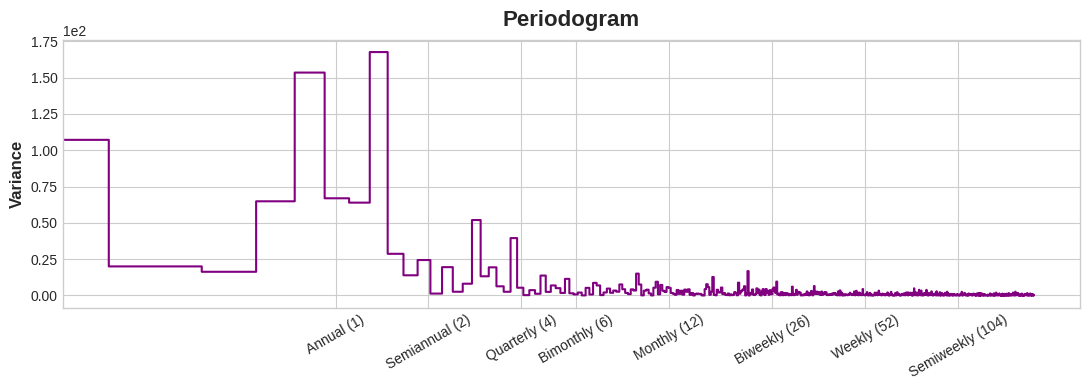

In [40]:
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_VietTri_Updated.csv')
df['date'] = pd.to_datetime(df['date'])

df = df.sort_values(by='date')
df = df.reset_index()


data = df[['date', 'AQI']]
data = data.set_index('date').to_period('D')
data.sort_index()

# data_temp = data.loc['2019']
data_temp = data
plot_periodogram(data_temp['AQI']);

RMSE: 56.1105954382845
MAE: 43.435428934847124
MAPE: 54.364098880179235


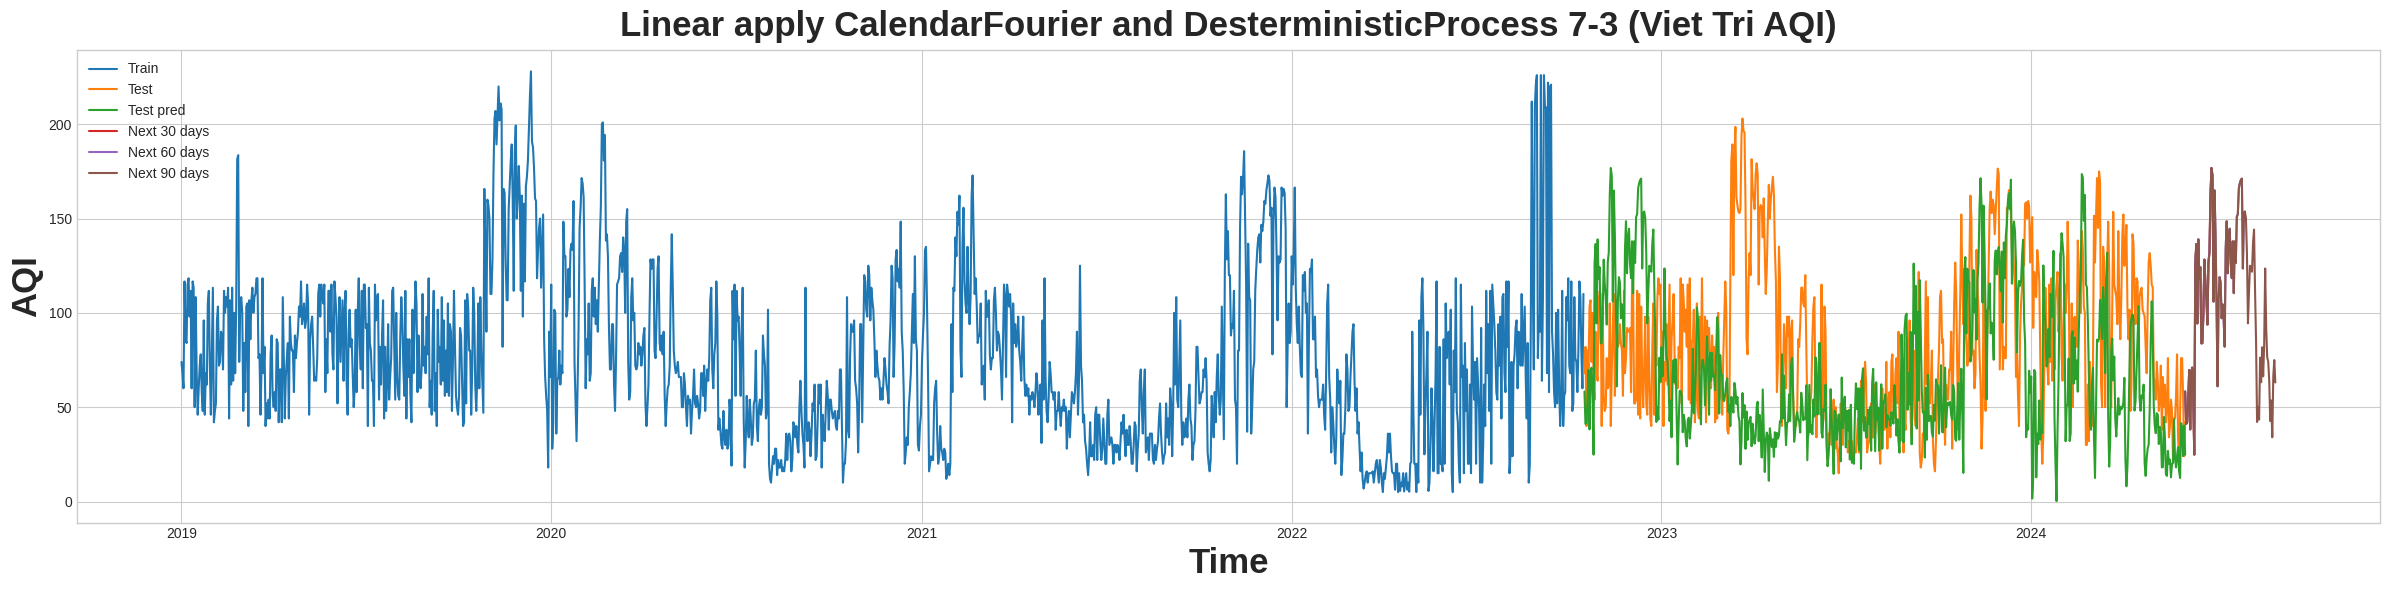

In [41]:
# Chia du lieu 7:3
train_size = int(0.7*len(df))

train_data = data[:train_size]
test_data = data[train_size:]


#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order = 365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# # -- Preparing the validate data
# X_val = dp.out_of_sample(steps=len(val_data))
# y_val_pred = model.predict(X_val)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)
mape = np.mean(np.abs((test_data - y_test_pred) / test_data)) * 100

# print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')



# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')
future_60dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=60, freq='D').to_period('D')
future_90dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=90, freq='D').to_period('D')


X_future = dp.out_of_sample(steps=30)
X_60future = dp.out_of_sample(steps=60)
X_90future = dp.out_of_sample(steps=90)

y_next_30days = model.predict(X_future)
y_next_60days = model.predict(X_60future)
y_next_90days = model.predict(X_90future)

# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
plt.plot(test_data.index.to_timestamp(), y_test_pred)

# plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.plot(future_60dates.to_timestamp(), y_next_60days)
plt.plot(future_90dates.to_timestamp(), y_next_90days)
plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 7-3 (Viet Tri AQI)', fontsize=25)
plt.xlabel('Time', fontsize=25)
plt.ylabel('AQI', fontsize=25)
plt.show()

RMSE: 56.1105954382845
MAE: 33.14386374145561
MAPE: 49.979830268609426


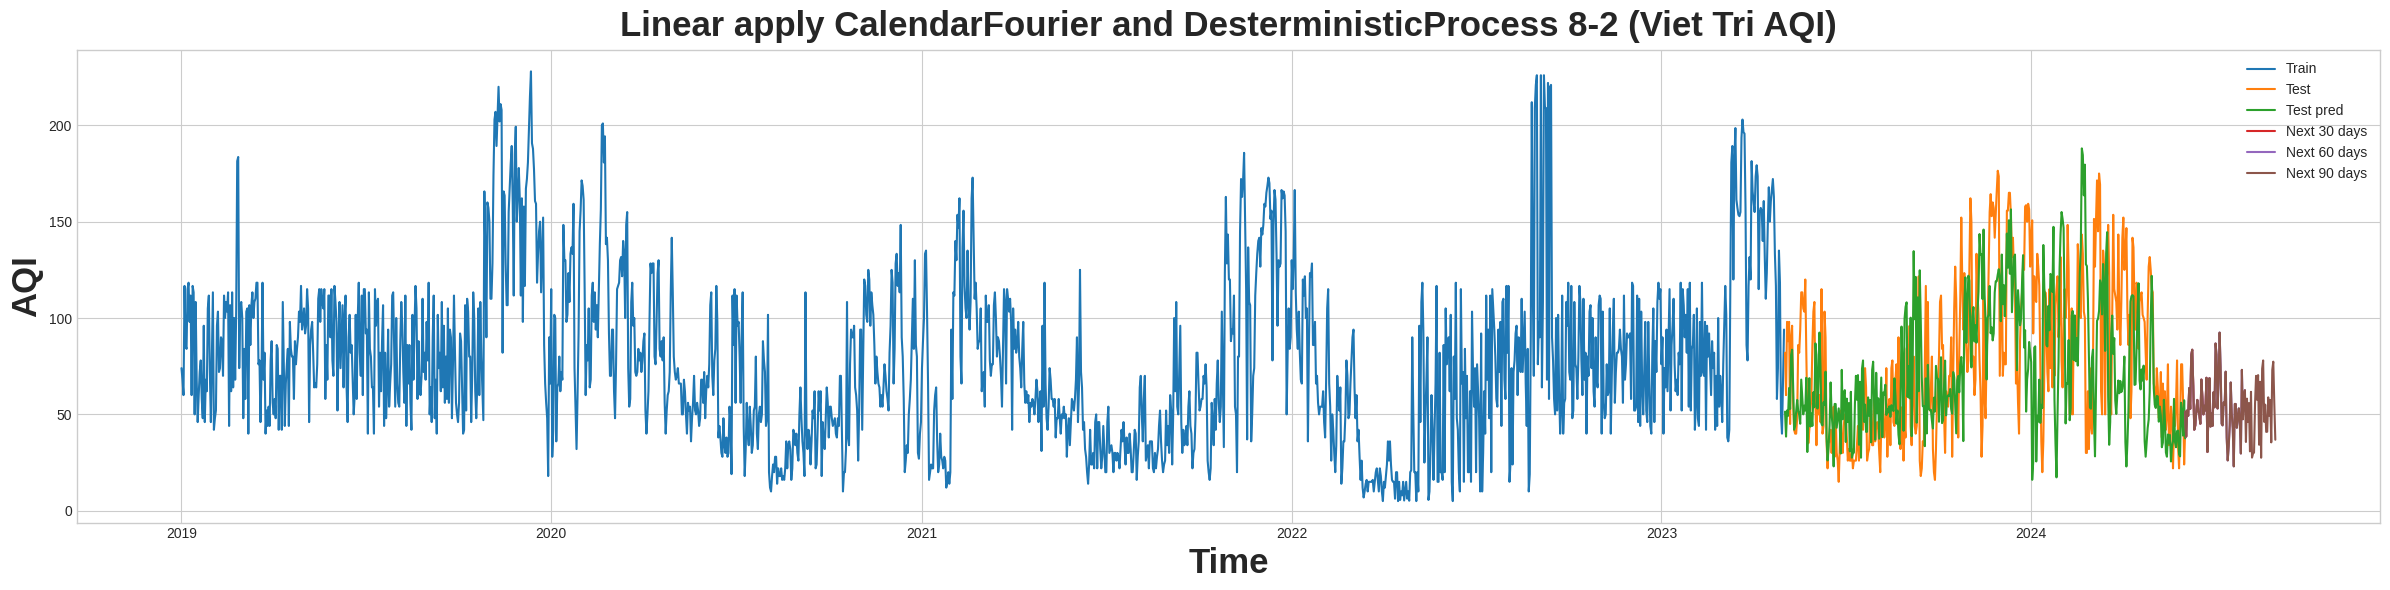

In [42]:
# Chia du lieu 8:2
train_size = int(0.8*len(df))


train_data = data[:train_size]
test_data = data[train_size:]


#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order =365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
# X_val = dp.out_of_sample(steps=len(val_data))
# y_val_pred = model.predict(X_val)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính toán các chỉ số đánh giá (tren tap test)
# mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)
mape = np.mean(np.abs((test_data - y_test_pred) / test_data)) * 100

# print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')



# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')
future_60dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=60, freq='D').to_period('D')
future_90dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=90, freq='D').to_period('D')


X_future = dp.out_of_sample(steps=30)
X_60future = dp.out_of_sample(steps=60)
X_90future = dp.out_of_sample(steps=90)

y_next_30days = model.predict(X_future)
y_next_60days = model.predict(X_60future)
y_next_90days = model.predict(X_90future)

# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
plt.plot(test_data.index.to_timestamp(), y_test_pred)

# plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.plot(future_60dates.to_timestamp(), y_next_60days)
plt.plot(future_90dates.to_timestamp(), y_next_90days)
plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 8-2 (Viet Tri AQI)', fontsize=25)
plt.xlabel('Time', fontsize=25)
plt.ylabel('AQI', fontsize=25)
plt.show()

RMSE: 48.60896451251979
MAE: 39.13348356897984
MAPE: 44.79795755681954


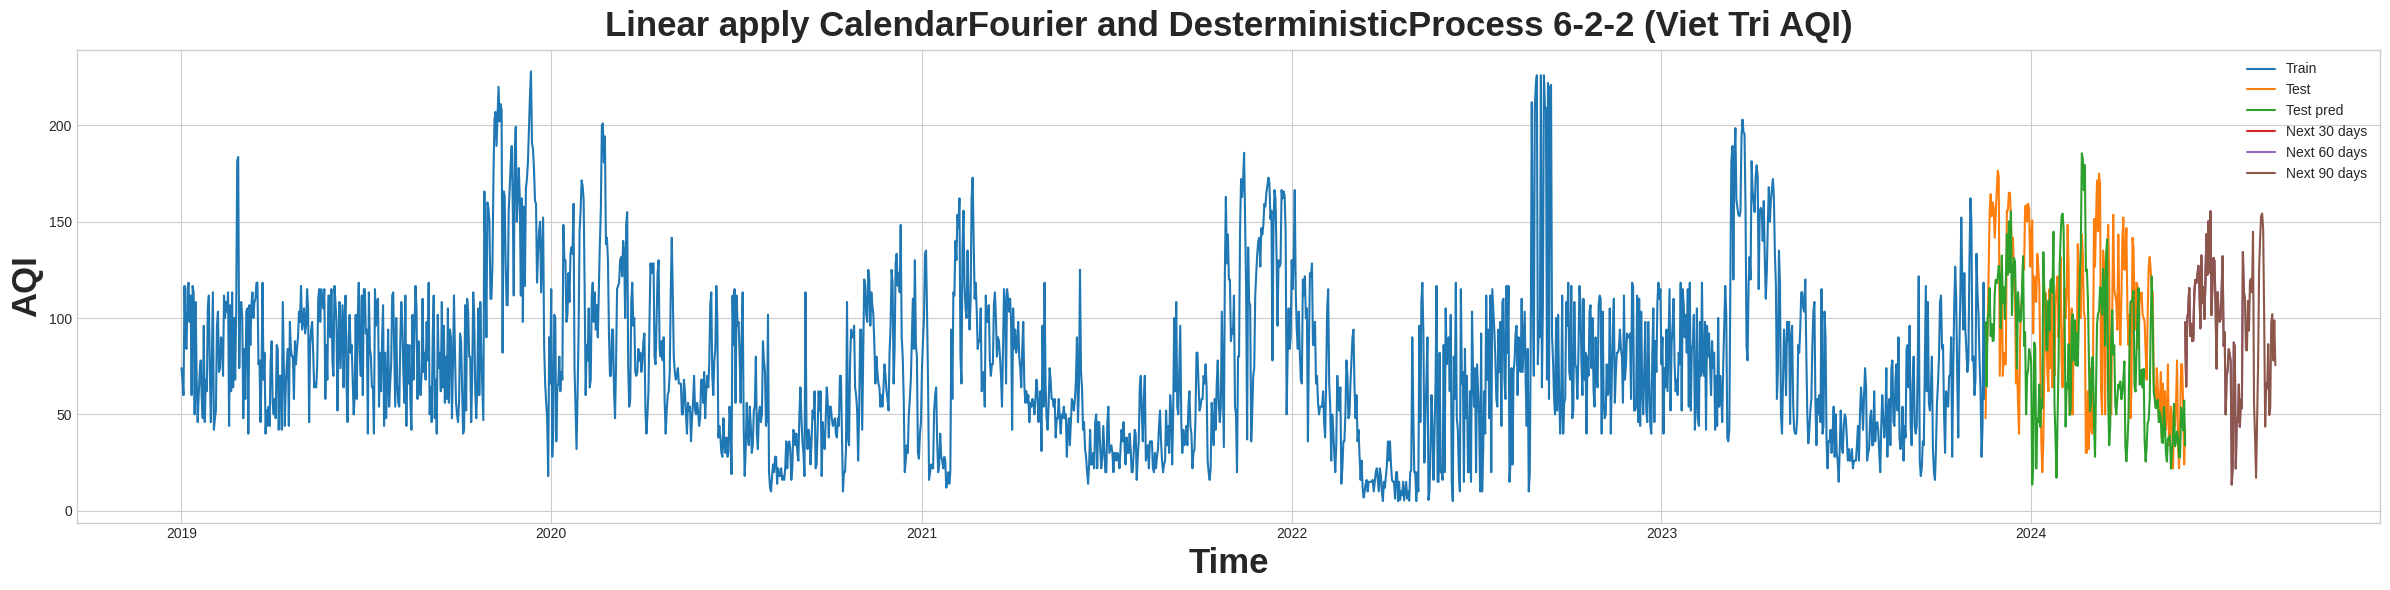

In [43]:
# Chia du lieu 9:1
train_size = int(0.9*len(df))

train_data = data[:train_size]
test_data = data[train_size:]


#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order = 365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
# X_val = dp.out_of_sample(steps=len(val_data))
# y_val_pred = model.predict(X_val)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)
mape = np.mean(np.abs((test_data - y_test_pred) / test_data)) * 100

# print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')



# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')
future_60dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=60, freq='D').to_period('D')
future_90dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=90, freq='D').to_period('D')


X_future = dp.out_of_sample(steps=30)
X_60future = dp.out_of_sample(steps=60)
X_90future = dp.out_of_sample(steps=90)

y_next_30days = model.predict(X_future)
y_next_60days = model.predict(X_60future)
y_next_90days = model.predict(X_90future)

# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
plt.plot(test_data.index.to_timestamp(), y_test_pred)

# plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.plot(future_60dates.to_timestamp(), y_next_60days)
plt.plot(future_90dates.to_timestamp(), y_next_90days)
plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 9-1 (Viet Tri AQI)', fontsize=25)
plt.xlabel('Time', fontsize=25)
plt.ylabel('AQI', fontsize=25)
plt.show()